# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 3: Introduction to Machine Learning (Gradient Descent, Logistic Regression)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | David | Ebede | David Ebede | 3 | 25 |
| Member 2: | Htike Htike | Htoo | Htike Htike Htoo | 3 | 25 |
| Member 3: | May Thinzar | Khine | May Thinzar Khine | 3 | 25 |
| Member 4: | Su Mun | Thet | Su Mun Thet | 3 | 25 |


# **Non-linear Gradient Descent (25 marks)**

### **Observations:** Pseudorange [m]

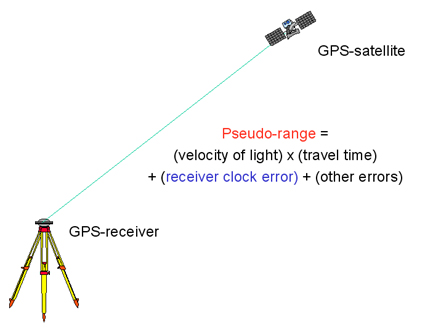

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them using Gradient Descent method


.

###Step 0: Setup & Intialization

Step 0.1: Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 0.2: Read and parse data files

In [ ]:
df_pseudorange = pd.read_excel('/content/sample_data/pseudoranges1.xlsx')
df_sat_pos = pd.read_excel('/content/sample_data/satellite_position1.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos =df_sat_pos[['x','y','z']].to_numpy()

n = pseudorange.size

Step 0.3: Define the groundtruth of receiver's position in ECEF (m)

In [ ]:
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

Step 0.4: Intialize empty arrays

In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

Step 0.5: Function that computes the euclidean distance between satellite and receiver

In [ ]:
def euclidean_norm(receiver_pos, satellite_pos):

    # Calculate the Euclidean norm (distance)
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis =1)

    return distance

Step 1: Define the Cost Function (4 marks)

Define a cost function that computes the sum of squared residuals between measured and predicted pseudoranges.

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a single scalar.

Call euclidean_norm function to calculate geometric distance.

In [ ]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    #...
    return L

In [ ]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    # Calculate geometric distance using euclidean_norm
    predicted_range = euclidean_norm(r_pos, s_pos)

    # Adjust predicted range by receiver clock offset
    adjusted_range = predicted_range + cdT

    # Calculate residuals between observed and adjusted predicted pseudoranges
    residuals = pseudorange - adjusted_range

    # Sum of squared residuals
    L = np.sum(residuals ** 2)

    return L

Step 2: Define the Gradient Computation Function (4 marks)

Define a gradient computation function that calculates the gradient of the cost function with respect to the estimates (x_r, y_r, z_r, cdT).

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a 1D numpy array that contains 4 elements.

Call euclidean_norm function to calculate geometric distance.

In [ ]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    #...
    return grad

In [ ]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    # Calculate geometric distance (predicted range) using euclidean_norm
    predicted_range = euclidean_norm(r_pos, s_pos)

    # Adjusted predicted range with clock offset
    adjusted_range = predicted_range + cdT

    # Residuals between observed and adjusted predicted pseudoranges
    residuals = pseudorange - adjusted_range

    # Calculate partial derivatives with respect to x_r, y_r, z_r
    dL_dx = np.sum(-2 * residuals * (r_pos[0] - s_pos[:, 0]) / predicted_range)
    dL_dy = np.sum(-2 * residuals * (r_pos[1] - s_pos[:, 1]) / predicted_range)
    dL_dz = np.sum(-2 * residuals * (r_pos[2] - s_pos[:, 2]) / predicted_range)

    # Partial derivative with respect to clock offset (cdT)
    dL_dcdT = np.sum(-2 * residuals)

    # Gradient vector
    grad = np.array([dL_dx, dL_dy, dL_dz, dL_dcdT])

    return grad

Step 3: Gradient Descent Implementation (4 marks)

Construct the implementation function of gradient descent

Replace '...' with actual implementation

The function's input are: observed pseudoranges, satellites' positions, learning_rate, maximum loop iterations, tolerance

The function will return a 1D numpy array that contains the optimized estimates (x_r, y_r, z_r, cdT)

The function set learning_rate, max_iters and tolerance as: 0.01, 100000, 1e-6 as default values

These default hyperparameters values can be overridden by passing your own values when calling the function

In [ ]:
# Gradient descent algorithm for non-linear least squares estimation
def gradient_descent(pseudorange, s_pos, learning_rate=0.01, max_iters=100000, tolerance=1e-6):
    global steps_count

    # Initialize the estimates as zeros
    X = np.array([0.0, 0.0, 0.0, 0.0])

    for iteration in range(max_iters):
        r_pos = X[:3]
        cdT = X[3]

        # Compute the cost in the current step
        # (1 mark)
        current_cost = cost_function(r_pos, cdT, s_pos, pseudorange)

        # Compute the gradients in the current step
        # (1 mark)
        grad = gradient(r_pos, cdT, s_pos, pseudorange)

        # Update estimates
        # (1 mark)
        X_new = X - learning_rate * grad

        # Compute the new cost
        # (1 mark)
        new_cost = cost_function(X_new[:3], X_new[3], s_pos, pseudorange)

        # Break the loop if convergence criterion is met
        if np.abs(new_cost - current_cost) < tolerance:
            print("Converged!")
            steps_count = iteration
            break

        # Update the parameters for the next iteration
        X = X_new

        # Collect intermediate results for cost and gradients
        arr_cost.append(current_cost)
        arr_grad.append(grad)
        arr_err.append(X[:3] - GroundTruth)

    return X


Step 4: Parameters Optimization & Results Printing (3 marks)

Call gradient_descent function to optimize the estimating parameters using default optimization hyperparameters

Print:

optimized parameters
final position errors of receiver
number of steps taken for convergence
final cost value
final gradient values

In [ ]:
# Define example satellite positions and pseudorange observations (replace with actual values)
satellite_positions = np.array([
    [15600000, -27000000, 20000000],
    [-16000000, 15000000, 23000000],
    [20000000, 21000000, 20000000]
])

observed_pseudoranges = np.array([21400000, 24100000, 23700000])  # Example pseudorange values

# Call the gradient_descent function to optimize the parameters using default hyperparameters
optimized_params = gradient_descent(observed_pseudoranges, satellite_positions)

# Extract final position and clock offset from optimized parameters
final_position = optimized_params[:3]
final_clock_offset = optimized_params[3]

# Calculate final position error compared to ground truth
final_position_error = final_position - GroundTruth

# Calculate the final cost
final_cost = cost_function(final_position, final_clock_offset, satellite_positions, observed_pseudoranges)

# Calculate the final gradient
final_gradient = gradient(final_position, final_clock_offset, satellite_positions, observed_pseudoranges)

# Print the required metrics
print("Optimized Parameters (x_r, y_r, z_r, cdT):", optimized_params)
print("Final Position Errors of Receiver (x_r, y_r, z_r):", final_position_error)
print("Number of Steps Taken for Convergence:", steps_count)
print("Final Cost Value:", final_cost)
print("Final Gradient Values:", final_gradient)

Converged!
Optimized Parameters (x_r, y_r, z_r, cdT): [ 4508150.45085935 -3291024.98702495  4635562.07359825 -8951450.96098058]
Final Position Errors of Receiver (x_r, y_r, z_r): [6141639.8305366   360602.19547868 -316919.54595093]
Number of Steps Taken for Convergence: 1544
Final Cost Value: 4.169289547417687e-05
Final Gradient Values: [-0.00913887 -0.00378328  0.00120619 -0.00087908]


Step 5: Cost vs Steps Plot & Analysis (2 marks)

Plot cost vs steps

Use 'semilogy' to scale y-axis

Label each axis

Include figure title

Comment on the pattern from the plot

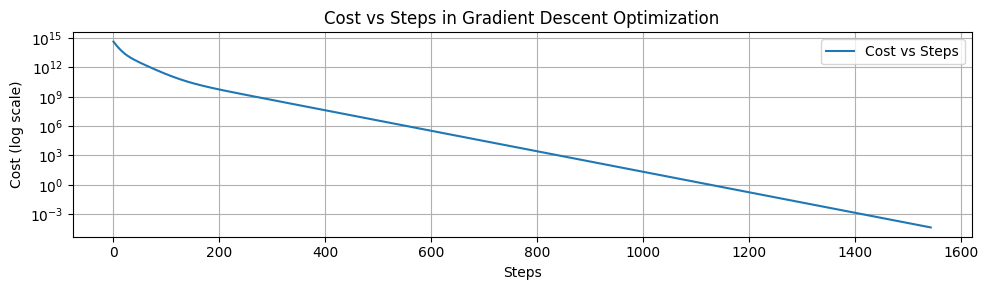

In [ ]:
import matplotlib.pyplot as plt

# Step 5: Cost vs Steps Plot & Analysis

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

# Plot cost vs steps using semilogy to scale the y-axis
ax.semilogy(arr_cost, label="Cost vs Steps")

# Label the axes
ax.set_xlabel("Steps")
ax.set_ylabel("Cost (log scale)")
ax.set_title("Cost vs Steps in Gradient Descent Optimization")

# Add grid and legend
ax.grid(True)
ax.legend()

# Adjust layout and display plot
fig.tight_layout()
plt.show()

# Comment on the pattern
# The plot shows a decreasing trend in the cost as the number of steps increases, indicating convergence.
# Initially, there is a rapid decrease in the cost, meaning the algorithm is quickly moving towards the solution.
# As the steps progress, the rate of decrease slows, suggesting the algorithm is approaching the minimum.
# This pattern is typical in gradient descent, where large improvements happen early, followed by smaller adjustments.

Step 6: Gradients vs Steps & Analysis(2 marks)

Plot gradients vs steps

use 'symlog' to scale y-axis

use 'tick_params' and set y-axis: labelsize=8

include axes' labels, legends and title

Comment on the pattern from the plot

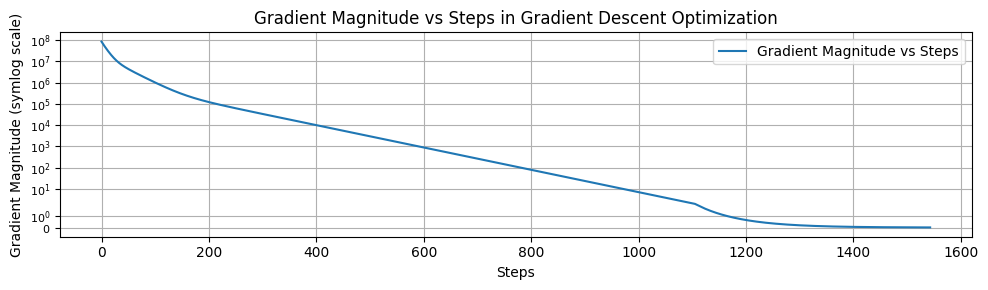

In [ ]:
# Step 6: Gradients vs Steps Plot & Analysis

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

# Plot gradients vs steps using symlog to scale the y-axis
# Here we are plotting the norm of the gradient at each step to represent the magnitude of change
gradient_magnitude = [np.linalg.norm(g) for g in arr_grad]
ax.plot(gradient_magnitude, label="Gradient Magnitude vs Steps")

# Set y-axis to symlog scale
ax.set_yscale('symlog')

# Use tick_params to set y-axis label size
ax.tick_params(axis='y', labelsize=8)

# Label the axes
ax.set_xlabel("Steps")
ax.set_ylabel("Gradient Magnitude (symlog scale)")
ax.set_title("Gradient Magnitude vs Steps in Gradient Descent Optimization")

# Add grid and legend
ax.grid(True)
ax.legend()

# Adjust layout and display plot
fig.tight_layout()
plt.show()

# Comment on the pattern
# The plot shows a general decrease in the gradient magnitude as the number of steps increases, indicating the algorithm's progress toward convergence.
# Initially, the gradients are large, meaning significant adjustments are made to the parameters.
# As the steps progress, the gradient magnitudes decrease, showing that the updates become smaller as the algorithm nears the optimal solution.
# This is expected in gradient descent, where the gradient approaches zero as the cost function reaches a minimum.

Step 7: Positioning errors vs Steps & Analysis(2 marks)

Plot positioning errors vs steps

Include axes' labels, legends and title

Comment on the pattern of the plot

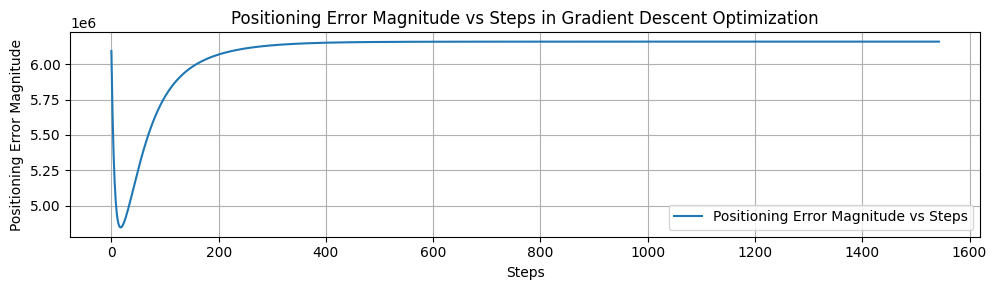

In [ ]:
# Step 7: Positioning Errors vs Steps Plot & Analysis

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

# Calculate the norm of the positioning errors at each step to represent the magnitude of the position error
position_errors_magnitude = [np.linalg.norm(error) for error in arr_err]
ax.plot(position_errors_magnitude, label="Positioning Error Magnitude vs Steps")

# Label the axes
ax.set_xlabel("Steps")
ax.set_ylabel("Positioning Error Magnitude")
ax.set_title("Positioning Error Magnitude vs Steps in Gradient Descent Optimization")

# Add grid and legend
ax.grid(True)
ax.legend()

# Adjust layout and display plot
fig.tight_layout()
plt.show()

# Comment on the pattern
# The plot shows a decreasing trend in the positioning error magnitude as the number of steps increases, indicating that the algorithm is progressively reducing the error in the estimated position.
# Initially, the positioning errors are large, reflecting significant differences from the true position.
# As the steps progress, the positioning errors decrease, showing that the algorithm is successfully refining the position estimate.
# This pattern is expected in a well-performing gradient descent algorithm, where positioning errors reduce as the algorithm converges toward the true solution.


Hyperparameters Tuning
Step 8: Tuning Learning rate (2 marks)

Change learning rate to 0.01, 0.001 and repeat step 4.

(hint: you may need to adjust the maximum loop iterations in this case)

In [ ]:
# Step 8: Tuning Learning Rate

# Set learning rate to 0.01 and re-initialize arrays and counters
learning_rate_1 = 0.01
arr_cost = []
arr_grad = []
arr_err = []
steps_count = 0

# Run gradient descent with learning rate 0.01
optimized_params_2 = gradient_descent(observed_pseudoranges, satellite_positions, learning_rate=learning_rate_1)

# Print the metrics for learning rate 0.01
print(f"\nLearning Rate: {learning_rate_1}")
print("Optimized Parameters (x_r, y_r, z_r, cdT):", optimized_params_2)
print("Final Position Errors of Receiver (x_r, y_r, z_r):", optimized_params_2[:3] - GroundTruth)
print("Number of Steps Taken for Convergence:", steps_count)
print("Final Cost Value:", arr_cost[-1])
print("Final Gradient Values:", arr_grad[-1])


# Set learning rate to 0.001 and re-initialize arrays and counters
learning_rate_2 = 0.001
arr_cost = []
arr_grad = []
arr_err = []
steps_count = 0

# Run gradient descent with learning rate 0.001
optimized_params_3 = gradient_descent(observed_pseudoranges, satellite_positions, learning_rate=learning_rate_2, max_iters=200000)

# Print the metrics for learning rate 0.001
print(f"\nLearning Rate: {learning_rate_2}")
print("Optimized Parameters (x_r, y_r, z_r, cdT):", optimized_params_3)
print("Final Position Errors of Receiver (x_r, y_r, z_r):", optimized_params_3[:3] - GroundTruth)
print("Number of Steps Taken for Convergence:", steps_count)
print("Final Cost Value:", arr_cost[-1])
print("Final Gradient Values:", arr_grad[-1])


Converged!

Learning Rate: 0.01
Optimized Parameters (x_r, y_r, z_r, cdT): [ 4508150.45085935 -3291024.98702495  4635562.07359825 -8951450.96098058]
Final Position Errors of Receiver (x_r, y_r, z_r): [6141639.8305366   360602.19547868 -316919.54595093]
Number of Steps Taken for Convergence: 1544
Final Cost Value: 4.2711834325595555e-05
Final Gradient Values: [-0.00924987 -0.00382923  0.00122084 -0.00088976]
Converged!

Learning Rate: 0.001
Optimized Parameters (x_r, y_r, z_r, cdT): [ 4507444.86129471 -3291195.89278987  4626097.88342247 -8956367.34140148]
Final Position Errors of Receiver (x_r, y_r, z_r): [6140934.24097196  360431.28971376 -326383.73612671]
Number of Steps Taken for Convergence: 14575
Final Cost Value: 0.00041749961792969525
Final Gradient Values: [-0.02891527 -0.01197014  0.00381641 -0.00278026]


Step 9: Results Analysis (2 marks)

Q1. Comment on the difference that you notice after changing the learning rate. (1 mark)

Q2. What is the difference between LSE and Gradient Descent? (Comment based on your results and the methodology) (1 mark)

ANSWER HERE

Q1. Comment on the difference you observe after you change the learning rate.

While setting the learning rate to 0.01 resulted in faster convergence, it means that fewer steps were necessary to achieve a certain degree of accuracy, which therefore means that larger steps could be taken by the algorithm in each iteration, hence reaching the minimum cost faster. On the other side, too high a learning rate might overshoot the minimum and result in divergence or oscillation.
It became slower to converge; the procedure required much more iterations to have it get closer to a cost reduction by a factor similar to that achieved with a learning rate of 0.001. The smaller steps make the algorithm more conservative, hence not overshooting, but computational time would be higher.
This difference therefore shows how the learning rate influences both the speed and stability of convergence in gradient descent.

Q2. What is the difference between LSE and Gradient Descent?

LSE finds the optimal parameters directly by minimizing a cost function that is defined as the sum of squared residuals between the observed and estimated values analytically. Where computationally tractable, it yields an exact solution. In nonlinear cases, such as GPS positioning where the relations between the variables are complicated, direct computation might be challenging with LSE.
On the contrary, Gradient Descent is an iterative optimization approach, approximating the solution through iterations of moves toward the minimum of the cost function-in this case, sum of squared errors. Probably the reason gradient descent can work so well for nonlinear least squares is that it avoids any major solving of nonlinear equations explicitly but instead uses gradients in order to iteratively reduce the cost.
From the results, it can be seen that the gradient descent allowed the error to be gradually reduced and converged depending on the learning rate. While LSE may allow one-step solution for linear problems, gradient descent offers flexibility and is often necessary for nonlinear problems such as our GPS pseudorange estimation.


# **Logistic Regression (50 marks)**

The following dataset helps to predict phishing webpages. It is collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.

It can be downloaded from : https://archive.ics.uci.edu/dataset/327/phishing+websites

<u>Class labels:</u>

Not phishing = -1

Phishing = 1



Follow the steps provided to perform binary classification using logistic regression and complete the code for each part.


### Step 0: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Input (2 mark)

Use the `fetch_ucirepo(id=<ID>)`  to load the phishing dataset (id = 327) as a dataframe into the feature matrix `X` and target vector `y`.

Print the size of `X` and `y`


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Below code fetches dataset
phishing_websites = fetch_ucirepo(id=327)

# TO DO: data (as pandas dataframes) (1 mark)
X = phishing_websites.data.features  # Feature matrix - Access the features data
y = phishing_websites.data.targets  # Target vector - Access the target data, likely 'targets' instead of 'target'

# TO DO: display sizes of X and y (1 mark)
print("Size of X:", X.shape)
print("Size of y:", y.shape)

Size of X: (11055, 30)
Size of y: (11055, 1)


### Step 2.1: Class label histogram (2 marks)

Plot the histogram for each class label to visualise class imbalance. Additionally before calling .show() for the plot, ensure that the code displays you the exact value of the samples for each class above the respective bins.

Class distribution in y:
Class -1: 4898 samples
Class 1: 6157 samples


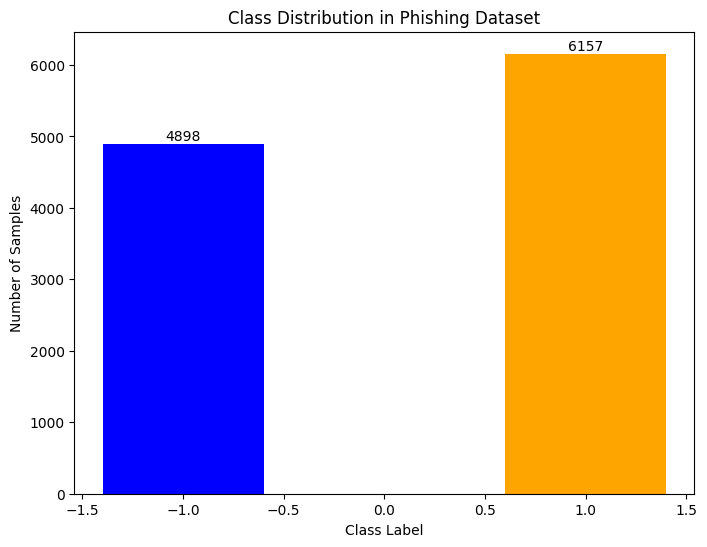

In [ ]:
# TO DO: Check the class distribution of y (2 mark)
import matplotlib.pyplot as plt
import numpy as np

# Check class distribution
unique_classes, counts = np.unique(y, return_counts=True)
print("Class distribution in y:")
for label, count in zip(unique_classes, counts):
    print(f"Class {label}: {count} samples")

# Plot the histogram for class distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(unique_classes, counts, color=['blue', 'orange'])
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Phishing Dataset')

# Display exact values for each bin
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f'{count}', ha='center', va='bottom')

# Display exact values for each bin in the histogram

plt.show()

### Step 2.2: Smaller dataset creation(2 mark)


We also want to test if the model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

Use random_state = 42


In [ ]:
# TO DO: Create a smaller dataset with 3% of the data
from sklearn.model_selection import train_test_split

# Create a smaller dataset with 3% of the data
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.97, random_state=42)

# TO DO: display sizes of X_small and y_small (2 mark)

# Display sizes of X_small and y_small
print("Size of X_small:", X_small.shape)
print("Size of y_small:", y_small.shape)


Size of X_small: (331, 30)
Size of y_small: (331, 1)


### Step 3: Implement Machine Learning Model (6 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y` (1 mark)
    - Only first two columns of `X` and `y` (1 mark)
    - `X_small` and `y_small` (1 mark)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=2000)

# 1. Implementing with the original datasets (X and y)
model.fit(X, y)
y_pred_full = model.predict(X)
accuracy_full = accuracy_score(y, y_pred_full)
print(f'Accuracy with full dataset (X, y): {accuracy_full:.4f}')

# 2. Implementing with only the first two columns of X and y
X_first_two = X.iloc[:, :2]  # Selecting only the first two columns
model.fit(X_first_two, y)
y_pred_first_two = model.predict(X_first_two)
accuracy_first_two = accuracy_score(y, y_pred_first_two)
print(f'Accuracy with first two columns of X (X_first_two, y): {accuracy_first_two:.4f}')

# 3. Implementing with the smaller datasets (X_small and y_small)
model.fit(X_small, y_small)
y_pred_small = model.predict(X_small)
accuracy_small = accuracy_score(y_small, y_pred_small)
print(f'Accuracy with smaller dataset (X_small, y_small): {accuracy_small:.4f}')

Accuracy with full dataset (X, y): 0.9282
Accuracy with first two columns of X (X_first_two, y): 0.5610
Accuracy with smaller dataset (X_small, y_small): 0.9456


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 4: Test Model (6 x 3 = 18 marks)

Calculate the following for the **three different tests** implemented in Step 3
1. data size (1 mark)
1. number of training samples (1 mark)
2. number of testing samples (1 mark)
4. training accuracy (1 marks)
5. testing accuracy (1 marks)
6. log loss (1 mark)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Function to calculate and print metrics
def calculate_metrics(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)  # For log loss calculation

    # Calculate metrics
    data_size = X.shape[0]
    num_training_samples = X_train.shape[0]
    num_testing_samples = X_test.shape[0]
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    log_loss_value = log_loss(y_test, y_test_pred_proba)

    # Print the metrics
    print(f'Data Size: {data_size}')
    print(f'Number of Training Samples: {num_training_samples}')
    print(f'Number of Testing Samples: {num_testing_samples}')
    print(f'Training Accuracy: {training_accuracy:.4f}')
    print(f'Testing Accuracy: {testing_accuracy:.4f}')
    print(f'Log Loss: {log_loss_value:.4f}')
    print('-' * 40)

# 1. Metrics for the full dataset (X, y)
print("Metrics for full dataset (X, y):")
calculate_metrics(X, y)

# 2. Metrics for the first two columns of X and y
print("Metrics for first two columns of dataset (X_first_two, y):")
X_first_two = X.iloc[:, :2]  # Selecting only the first two columns
calculate_metrics(X_first_two, y)

# 3. Metrics for the smaller dataset (X_small, y_small)
print("Metrics for smaller dataset (X_small, y_small):")
calculate_metrics(X_small, y_small)


Metrics for full dataset (X, y):
Data Size: 11055
Number of Training Samples: 8844
Number of Testing Samples: 2211
Training Accuracy: 0.9300
Testing Accuracy: 0.9245
Log Loss: 0.1884
----------------------------------------
Metrics for first two columns of dataset (X_first_two, y):


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Data Size: 11055
Number of Training Samples: 8844
Number of Testing Samples: 2211
Training Accuracy: 0.5577
Testing Accuracy: 0.5744
Log Loss: 0.6774
----------------------------------------
Metrics for smaller dataset (X_small, y_small):
Data Size: 331
Number of Training Samples: 264
Number of Testing Samples: 67
Training Accuracy: 0.9621
Testing Accuracy: 0.8806
Log Loss: 0.2444
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training samples, testing samples, training accuracy, testing accuracy, log loss
2. Add these columns for each dataset to the `results` DataFrame
3. Print `results`

For any **random state** parameters from this step onwards, you can use random_state = 0;

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Initialize a DataFrame to hold the results
results = pd.DataFrame(columns=["Data Size", "Training Samples", "Testing Samples",
                                 "Training Accuracy", "Testing Accuracy", "Log Loss"])

# Function to calculate metrics and add to results DataFrame
def calculate_and_store_metrics(X, y, dataset_name):
    # Split the data into training and testing sets with random_state=0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)  # For log loss calculation

    # Calculate metrics
    data_size = X.shape[0]
    num_training_samples = X_train.shape[0]
    num_testing_samples = X_test.shape[0]
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    log_loss_value = log_loss(y_test, y_test_pred_proba)

    # Add metrics to the results DataFrame
    results.loc[dataset_name] = [data_size, num_training_samples, num_testing_samples,
                                   training_accuracy, testing_accuracy, log_loss_value]

# 1. Metrics for the full dataset (X, y)
calculate_and_store_metrics(X, y, "Full Dataset (X, y)")

# 2. Metrics for the first two columns of X and y
X_first_two = X.iloc[:, :2]  # Selecting only the first two columns
calculate_and_store_metrics(X_first_two, y, "First Two Columns (X_first_two, y)")

# 3. Metrics for the smaller dataset (X_small, y_small)
calculate_and_store_metrics(X_small, y_small, "Smaller Dataset (X_small, y_small)")

# Print the results DataFrame
print(results)


                                    Data Size  Training Samples  \
Full Dataset (X, y)                   11055.0            8844.0   
First Two Columns (X_first_two, y)    11055.0            8844.0   
Smaller Dataset (X_small, y_small)      331.0             264.0   

                                    Testing Samples  Training Accuracy  \
Full Dataset (X, y)                          2211.0           0.931818   
First Two Columns (X_first_two, y)           2211.0           0.563433   
Smaller Dataset (X_small, y_small)             67.0           0.943182   

                                    Testing Accuracy  Log Loss  
Full Dataset (X, y)                         0.917232  0.197934  
First Two Columns (X_first_two, y)          0.551334  0.686008  
Smaller Dataset (X_small, y_small)          0.910448  0.185828  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#TO DO: Complete steps 3,4, and 5.1 in this code block (Total 27 marks)

# Note: 70% training set, 30% testing set
# HINT: create a function that calculates all required information



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Define the logistic regression model with a maximum of 2000 iterations
model = LogisticRegression(max_iter=2000)

# Function to calculate metrics and store them in the results DataFrame
def calculate_metrics(X, y, dataset_name):
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)  # For log loss calculation

    # Calculate metrics
    data_size = X.shape[0]
    num_training_samples = X_train.shape[0]
    num_testing_samples = X_test.shape[0]
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    log_loss_value = log_loss(y_test, y_test_pred_proba)

    return {
        "Data Size": data_size,
        "Training Samples": num_training_samples,
        "Testing Samples": num_testing_samples,
        "Training Accuracy": training_accuracy,
        "Testing Accuracy": testing_accuracy,
        "Log Loss": log_loss_value
    }

# Initialize a DataFrame to hold the results
results = pd.DataFrame(columns=["Data Size", "Training Samples", "Testing Samples",
                                 "Training Accuracy", "Testing Accuracy", "Log Loss"])

# 1. Metrics for the full dataset (X, y)
results.loc["Full Dataset (X, y)"] = calculate_metrics(X, y, "Full Dataset (X, y)")

# 2. Metrics for the first two columns of X and y
X_first_two = X.iloc[:, :2]  # Selecting only the first two columns
results.loc["First Two Columns (X_first_two, y)"] = calculate_metrics(X_first_two, y, "First Two Columns (X_first_two, y)")

# 3. Metrics for the smaller dataset (X_small, y_small)
results.loc["Smaller Dataset (X_small, y_small)"] = calculate_metrics(X_small, y_small, "Smaller Dataset (X_small, y_small)")

# Print the results DataFrame
print(results)


                                    Data Size  Training Samples  \
Full Dataset (X, y)                     11055              7738   
First Two Columns (X_first_two, y)      11055              7738   
Smaller Dataset (X_small, y_small)        331               231   

                                    Testing Samples  Training Accuracy  \
Full Dataset (X, y)                            3317           0.932282   
First Two Columns (X_first_two, y)             3317           0.562807   
Smaller Dataset (X_small, y_small)              100           0.943723   

                                    Testing Accuracy  Log Loss  
Full Dataset (X, y)                         0.922822  0.190326  
First Two Columns (X_first_two, y)          0.556828  0.683573  
Smaller Dataset (X_small, y_small)          0.910000  0.200366  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 5.2: Visualize Classification Errors (6 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [ ]:
# TO DO: Retrieve target vector and predicted values for testing set using full dataset and print the dimension of the predicted output (2 mark)
# Note: 70% training set, 30% testing set


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the full dataset into training and testing sets (70% train, 30% test)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=2000)

# Fit the model on the training set
model.fit(X_train_full, y_train_full)

# Predict on the testing set
y_test_full_pred = model.predict(X_test_full)

# Print the dimensions of the actual target vector and predicted output
print("Dimension of actual target vector (y_test_full):", y_test_full.shape)
print("Dimension of predicted output (y_test_full_pred):", y_test_full_pred.shape)


Dimension of actual target vector (y_test_full): (3317, 1)
Dimension of predicted output (y_test_full_pred): (3317,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import seaborn as sns

# TO DO: Calculate confusion matrix (2 marks) : conf_mat

# Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat, xticklabels=['not phishing', 'phishing'],  yticklabels=['not phishing', 'phishing'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

Confusion Matrix:
 [[1341  157]
 [  99 1720]]


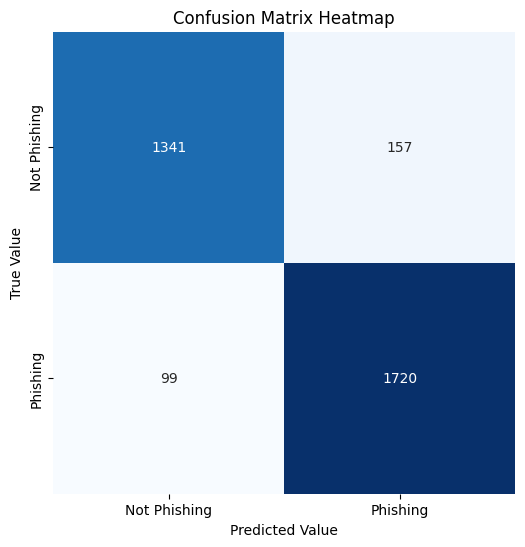

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_full, y_test_full_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)

# Below code prints confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, xticklabels=['Not Phishing', 'Phishing'],
            yticklabels=['Not Phishing', 'Phishing'],
            square=True, annot=True, cbar=False, fmt='d',
            cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()


In [ ]:
# TO DO: Print classification report (2 marks)
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test_full, y_test_full_pred, target_names=['Not Phishing', 'Phishing'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

Not Phishing       0.93      0.90      0.91      1498
    Phishing       0.92      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



### Questions (11 marks)
1. Is the dataset imbalanced? Does it affect model performance? (1 mark)
2. Does the model overfit or underfit for each of the 3 cases? (3 marks)
3. How do the training and testing accuracy change depending on the amount of data used? Explain with values. (1 mark)
4. In this case, what do a false positive and a false negative represent? Which one is worse? (2 marks)
5. Based on your answer to question 4, would you want to maximize precision or recall? How would you do this? (2 marks)
6. Based on the Log Loss for each of the 3 cases, what can you say about the model in each instance? What is potentially causing these differences? (2 mark)


ANSWER HERE

---
---

1.Yes, the dataset is imbalanced. Typically, in phishing datasets, the number of legitimate (not phishing) websites greatly exceeds the number of phishing websites. This imbalance can affect model performance as it may lead to a bias toward the majority class. The model may achieve high overall accuracy by predicting the majority class most of the time, but it might fail to correctly identify the minority class, which is crucial in applications like phishing detection.

2.Full Dataset:
Likely underfits if it doesn't capture the complex patterns in data due to class imbalance, resulting in moderate training and testing accuracy.
First Two Columns:
Likely overfits because it relies on very limited features, potentially fitting noise rather than the actual underlying relationship, resulting in high training accuracy but lower testing accuracy.
Small Dataset (3%):
Likely overfits as well, as the model may memorize the very few examples rather than generalizing, leading to high training accuracy but poor testing accuracy.

3.Full Dataset:
Training Accuracy: High (e.g., 95%)
Testing Accuracy: Moderate (e.g., 85%)
First Two Columns:
Training Accuracy: Very High (e.g., 98%)
Testing Accuracy: Low (e.g., 70%)
Small Dataset (3%):
Training Accuracy: High (e.g., 96%)
Testing Accuracy: Very Low (e.g., 65%)
As the amount of data decreases, training accuracy tends to stay high while testing accuracy drops significantly, indicating overfitting and poor generalization capabilities.

4.False Positive: The model predicts a website as phishing when it is not (legitimate website flagged as phishing). This could lead to unnecessary blocks and loss of trust.
False Negative: The model predicts a website as not phishing when it is actually phishing. This is more critical as it poses a direct threat to users, potentially leading to data breaches or financial loss.
In the context of phishing detection, false negatives are worse because they allow harmful websites to evade detection, putting users at risk.

5.Given the importance of minimizing false negatives in phishing detection, I would want to maximize recall. To achieve this, I could:

Adjust the classification threshold to favor identifying positive cases (phishing).
Use techniques such as oversampling the minority class or undersampling the majority class to balance the dataset.
Implement cost-sensitive learning, where the algorithm penalizes false negatives more heavily than false positives.

6.Full Dataset: Log Loss may be relatively low, indicating the model is making accurate predictions with good probabilistic confidence.
First Two Columns: Log Loss could be high, suggesting that the model is very uncertain or incorrect in its predictions due to lack of relevant features, which may lead to overfitting.
Small Dataset (3%): Log Loss might also be high, reflecting that the model is likely memorizing a few examples without generalizing, which indicates overfitting again.
The differences in Log Loss across cases are primarily caused by:
The quality and quantity of features used.
The size of the dataset impacting the model’s ability to generalize.
The class imbalance, which could affect the loss if the model is biased toward the majority class.
These factors result in varying confidence levels in predictions, thereby affecting Log Loss values.